In [31]:
# pull in dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [3]:
# read in csv files
annual_hours = pd.read_csv('Data/Working_hours/clean_annual_hours.csv')
gdp = pd.read_csv('Data/Working_hours/clean_gdp.csv')
home_hours = pd.read_csv('Data/Working_hours/clean_home_hours.csv')
producitivty = pd.read_csv('Data/Working_hours/clean_productivity.csv')
hours_weekly = pd.read_csv('Data/Working_hours/clean_weekly_hours.csv')

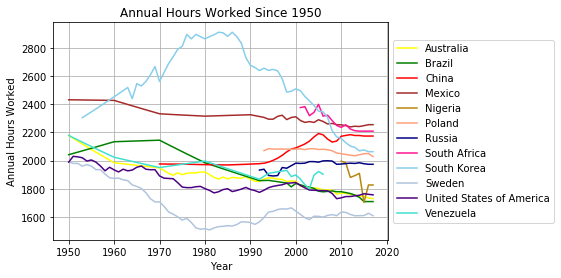

In [24]:
# line graph of hours worked per nation over time
aus_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='AUS']['Year'],annual_hours.loc[annual_hours['Code']=='AUS']['Average annual hours worked by persons engaged (hours per person engaged)'],color="yellow",label="Australia")
bra_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='BRA']['Year'],annual_hours.loc[annual_hours['Code']=='BRA']['Average annual hours worked by persons engaged (hours per person engaged)'],color="green",label="Brazil")
chn_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='CHN']['Year'],annual_hours.loc[annual_hours['Code']=='CHN']['Average annual hours worked by persons engaged (hours per person engaged)'],color="red",label="China")
mex_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='MEX']['Year'],annual_hours.loc[annual_hours['Code']=='MEX']['Average annual hours worked by persons engaged (hours per person engaged)'],color="brown",label="Mexico")
nga_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='NGA']['Year'],annual_hours.loc[annual_hours['Code']=='NGA']['Average annual hours worked by persons engaged (hours per person engaged)'],color="darkgoldenrod",label="Nigeria")
pol_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='POL']['Year'],annual_hours.loc[annual_hours['Code']=='POL']['Average annual hours worked by persons engaged (hours per person engaged)'],color="lightsalmon",label="Poland")
rus_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='RUS']['Year'],annual_hours.loc[annual_hours['Code']=='RUS']['Average annual hours worked by persons engaged (hours per person engaged)'],color="navy",label="Russia")
zaf_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='ZAF']['Year'],annual_hours.loc[annual_hours['Code']=='ZAF']['Average annual hours worked by persons engaged (hours per person engaged)'],color="deeppink",label="South Africa")
kor_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='KOR']['Year'],annual_hours.loc[annual_hours['Code']=='KOR']['Average annual hours worked by persons engaged (hours per person engaged)'],color="skyblue",label="South Korea")
swe_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='SWE']['Year'],annual_hours.loc[annual_hours['Code']=='SWE']['Average annual hours worked by persons engaged (hours per person engaged)'],color="lightsteelblue",label="Sweden")
usa_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='USA']['Year'],annual_hours.loc[annual_hours['Code']=='USA']['Average annual hours worked by persons engaged (hours per person engaged)'],color="indigo",label="United States of America")
ven_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='VEN']['Year'],annual_hours.loc[annual_hours['Code']=='VEN']['Average annual hours worked by persons engaged (hours per person engaged)'],color="turquoise",label="Venezuela")
plt.title("Annual Hours Worked Since 1950")
plt.xlabel("Year")
plt.ylabel("Annual Hours Worked")
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.grid()
plt.show()

In [35]:
# some additional data cleaning for the gdp data
del gdp['Unnamed: 0']
del gdp['Unnamed: 5']
gdp_df = gdp.loc[gdp['Working hours (hours per person engaged)']!=0.0000,:]
gdp_df = gdp_df.loc[gdp_df['GDP per capita (int.-$) (constant 2011 international $)']!=0.0000,:]
gdp_df

,Entity,Code,Year,Working hours (hours per person engaged),GDP per capita (int.-$) (constant 2011 international $)
40,Australia,AUS,1990.0,1867.9515,28658.36589
41,Australia,AUS,1991.0,1853.8984,28185.75290
42,Australia,AUS,1992.0,1851.8408,27969.06612
43,Australia,AUS,1993.0,1869.6207,28815.46298
44,Australia,AUS,1994.0,1877.7278,29646.41927
...,...,...,...,...,...
822,Venezuela,VEN,2002.0,1829.0203,13090.59206
823,Venezuela,VEN,2003.0,1801.2109,11860.73286
824,Venezuela,VEN,2004.0,1896.6949,13785.21822
825,Venezuela,VEN,2005.0,1922.8501,14948.12511


The r-squared is: -0.5168041886269452


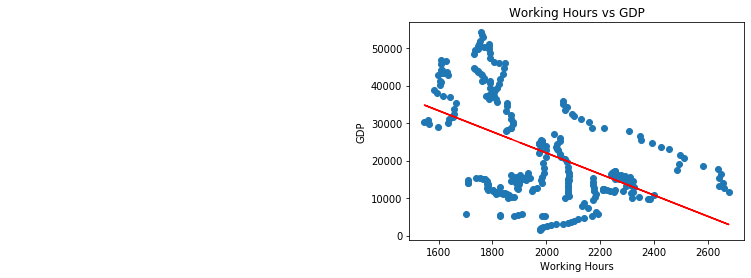

In [37]:
# scatter and linregression for working hours vs gdp
x_values = gdp_df['Working hours (hours per person engaged)']
y_values = gdp_df['GDP per capita (int.-$) (constant 2011 international $)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-0.12,300),fontsize=15,color="red")
plt.xlabel('Working Hours')
plt.ylabel('GDP')
plt.title('Working Hours vs GDP')
print(f"The r-squared is: {rvalue}")
plt.show()

In [43]:
home_hours_1950 = home_hours.loc[home_hours['Year']==1950,:]
plt.pie()

,Unnamed: 0,Entity,Year,Hours
0,5,Men 14+,1950,9.0
1,6,Men 14+,1960,10.7
2,7,Men 14+,1970,11.4
3,8,Men 14+,1980,12.9
4,9,Men 14+,1990,14.9
...,...,...,...,...
121,211,Women 65+,1970,33.0
122,212,Women 65+,1980,28.0
123,213,Women 65+,1990,28.6
124,214,Women 65+,2000,29.6


,Entity,Code,Year,Work hours per persons engaged,Productivity,Unnamed: 5
0,Afghanistan,AFG,1800,NaN,NaN,3280000
1,Afghanistan,AFG,1801,NaN,NaN,3280000
2,Afghanistan,AFG,1802,NaN,NaN,3280000
3,Afghanistan,AFG,1803,NaN,NaN,3280000
4,Afghanistan,AFG,1804,NaN,NaN,3280000


,Entity,Code,Year,(hours per week)
0,Australia,AUS,1870,56.2
1,Australia,AUS,1880,53.3
2,Australia,AUS,1890,50.5
3,Australia,AUS,1900,48.1
4,Australia,AUS,1913,44.7
